<a href="https://colab.research.google.com/github/Mateus-Brandao/Estudo/blob/main/Previs%C3%A3o_no_futebol_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Coleta e tratamento dos dados**

In [ ]:
dados_classificacao = pd.read_csv('ingles_classificacao.csv')
dados_classificacao.head()

,posicao,link,time,jogos,vitorias,empates,derrotas,golsFavor,golsContra,diferencaGols,pts,ano,mediaGolsFavor,mediaGolsContra
0,1,/futebol/time/_/id/359/arsenal,ARSENAL,38,26,12,0,73,26,47,90,2003,1.921053,0.684211
1,2,/futebol/time/_/id/363/chelsea,CHELSEA,38,24,7,7,67,30,37,79,2003,1.763158,0.789474
2,3,/futebol/time/_/id/360/manchester-united,MANCHESTER UNITED,38,23,6,9,64,35,29,75,2003,1.684211,0.921053
3,4,/futebol/time/_/id/364/liverpool,LIVERPOOL,38,16,12,10,55,37,18,60,2003,1.447368,0.973684
4,5,/futebol/time/_/id/361/newcastle-united,NEWCASTLE UNITED,38,13,17,8,52,40,12,56,2003,1.368421,1.052632


In [ ]:
dados_classificacao.describe()

,posicao,jogos,vitorias,empates,derrotas,golsFavor,golsContra,diferencaGols,pts,ano,mediaGolsFavor,mediaGolsContra
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,10.500000,37.284211,13.984211,9.315789,13.984211,49.992105,49.992105,0.000000,51.244737,2012.000000,1.341459,1.342135
std,5.773884,3.052446,6.122303,2.957083,5.654033,16.064265,13.597976,25.954598,17.642614,5.484447,0.418924,0.352713
min,1.000000,22.000000,1.000000,2.000000,0.000000,15.000000,15.000000,-69.000000,11.000000,2003.000000,0.526316,0.394737
25%,5.750000,38.000000,10.000000,7.000000,10.000000,39.000000,41.000000,-19.000000,39.000000,2007.000000,1.052632,1.098684
50%,10.500000,38.000000,12.000000,9.000000,15.000000,47.000000,51.000000,-6.000000,47.000000,2012.000000,1.236842,1.342105
75%,15.250000,38.000000,18.000000,11.000000,18.000000,59.000000,59.000000,16.000000,63.000000,2017.000000,1.578947,1.559211
max,20.000000,38.000000,32.000000,17.000000,29.000000,106.000000,89.000000,79.000000,100.000000,2021.000000,2.789474,2.342105


In [ ]:
dados_classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posicao          380 non-null    int64  
 1   link             380 non-null    object 
 2   time             380 non-null    object 
 3   jogos            380 non-null    int64  
 4   vitorias         380 non-null    int64  
 5   empates          380 non-null    int64  
 6   derrotas         380 non-null    int64  
 7   golsFavor        380 non-null    int64  
 8   golsContra       380 non-null    int64  
 9   diferencaGols    380 non-null    int64  
 10  pts              380 non-null    int64  
 11  ano              380 non-null    int64  
 12  mediaGolsFavor   380 non-null    float64
 13  mediaGolsContra  380 non-null    float64
dtypes: float64(2), int64(10), object(2)
memory usage: 41.7+ KB


In [ ]:
dados_elenco = pd.read_csv('ingles_elencos.csv')
dados_elenco.head()

,nome,pos,idade,alt,posicao,nacionalidade,jogos,substituicao,defesas,golsofridos,assistencias,faltascometidas,faltasofridas,cartaoamarelo,cartaovermelho,gols,time,ano,finalizacoes,chutesgol
0,Manuel Almunia,G,44,1.91 m,86 kg,Espanha,--,--,--,--,--,--,--,--,--,NaN,/futebol/time/_/id/359/arsenal,2003,NaN,NaN
1,Mark Howard,G,35,1.83 m,76 kg,Inglaterra,--,--,--,--,--,--,--,--,--,NaN,/futebol/time/_/id/359/arsenal,2003,NaN,NaN
2,Jens Lehmann1,G,51,1.91 m,87 kg,Alemanha,38,0,224,0,0,2,16,2,0,NaN,/futebol/time/_/id/359/arsenal,2003,NaN,NaN
3,Stuart Taylor13,G,40,1.96 m,79 kg,Inglaterra,--,--,--,--,--,--,--,--,--,NaN,/futebol/time/_/id/359/arsenal,2003,NaN,NaN
4,Ryan Garry,D,38,1.88 m,82 kg,Inglaterra,--,--,NaN,NaN,--,--,--,--,--,--,/futebol/time/_/id/359/arsenal,2003,--,--


In [ ]:
dados_elenco.describe()

,ano
count,12047.000000
mean,2012.024902
std,5.389283
min,2003.000000
25%,2008.000000
50%,2012.000000
75%,2017.000000
max,2021.000000


In [ ]:
dados_elenco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12047 entries, 0 to 12046
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             12047 non-null  object
 1   pos              12047 non-null  object
 2   idade            12047 non-null  object
 3   alt              12047 non-null  object
 4   posicao          12047 non-null  object
 5   nacionalidade    12047 non-null  object
 6   jogos            12047 non-null  object
 7   substituicao     12047 non-null  object
 8   defesas          1364 non-null   object
 9   golsofridos      1364 non-null   object
 10  assistencias     12047 non-null  object
 11  faltascometidas  12047 non-null  object
 12  faltasofridas    12047 non-null  object
 13  cartaoamarelo    12047 non-null  object
 14  cartaovermelho   12047 non-null  object
 15  gols             10683 non-null  object
 16  time             12047 non-null  object
 17  ano              12047 non-null

In [ ]:
# colocando todos os nomes dos times em minusculo
dados_classificacao.time = dados_classificacao.time.str.lower()
dados_classificacao.time.unique()

array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton & hove albion', 'huddersfield town',
       'brentford'], dtype=object)

In [ ]:
# retirando pontuações nos nomes dos times
dados_classificacao.time = dados_classificacao.time.replace('[^\w\s]',' ', regex = True)
dados_classificacao.time.unique()

array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton   hove albion', 'huddersfield town',
       'brentford'], dtype=object)

In [ ]:
# retirando espaços em branco duplicados
dados_classificacao.time = dados_classificacao.time.replace('\\s+',' ', regex = True)
dados_classificacao.time.unique()

array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton hove albion', 'huddersfield town',
       'brentford'], dtype=object)

In [ ]:
# dividindo o texto para obter o nome do time
print(dados_elenco.time[1].split('/'))
print(dados_elenco.time[1].split('/')[6])

['', 'futebol', 'time', '_', 'id', '359', 'arsenal']
arsenal


In [ ]:
# dividindo todos os nomes
dados_elenco.time = dados_elenco.time.apply(lambda x: x.split('/')[6])

In [ ]:
# aplicando o mesmo tratamento da tabela de classificacao
# colocando todos os nomes dos times em minusculo
dados_elenco.time = dados_elenco.time.str.lower()

# retirando espaços em branco duplicados
dados_elenco.time = dados_elenco.time.replace('\\s+',' ', regex = True)

# retirando pontuações nos nomes dos times
dados_elenco.time = dados_elenco.time.replace('[^\w\s]',' ', regex = True)


dados_elenco.time.unique()

array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton hove albion', 'huddersfield town',
       'brentford'], dtype=object)

In [ ]:
# transformando a coluna de idade em numerica
pd.to_numeric(dados_elenco.idade.unique(), errors = 'coerce')

array([ 44.,  35.,  51.,  40.,  38.,  47.,  36.,  37.,  45.,  48.,  43.,
        34.,  52.,  49.,  53.,  41.,  46.,  39.,  42.,  19.,  50.,  21.,
        28.,  23.,  54.,  60.,  25.,  55.,  26.,  33.,  30., 113.,  nan,
        29.,  32.,  31.,  27.,  20.,  24.,  18.,  22.,  17.])

In [ ]:
# transformando todas as outras colunas que precisam ser numericas
colunas_numericas = ['idade','alt','posicao','jogos','substituicao','defesas','golsofridos','assistencias','faltascometidas',
                     'faltasofridas','cartaoamarelo', 'cartaovermelho','gols','finalizacoes','chutesgol']

for c in colunas_numericas:
  dados_elenco[c] = dados_elenco[c].str.replace('[a-zA-Z]','')
  dados_elenco[c] = pd.to_numeric(dados_elenco[c], errors = 'coerce')

dados_elenco.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12047 entries, 0 to 12046
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             12047 non-null  object 
 1   pos              12047 non-null  object 
 2   idade            12016 non-null  float64
 3   alt              11664 non-null  float64
 4   posicao          11514 non-null  float64
 5   nacionalidade    12047 non-null  object 
 6   jogos            9943 non-null   float64
 7   substituicao     9943 non-null   float64
 8   defesas          1090 non-null   float64
 9   golsofridos      1090 non-null   float64
 10  assistencias     9943 non-null   float64
 11  faltascometidas  9943 non-null   float64
 12  faltasofridas    9943 non-null   float64
 13  cartaoamarelo    9943 non-null   float64
 14  cartaovermelho   9943 non-null   float64
 15  gols             8853 non-null   float64
 16  time             12047 non-null  object 
 17  ano         

In [ ]:
# selecionando as colunas que serão usadas de atributo
dados_elenco_select = dados_elenco[['nome','pos','idade','alt','posicao','nacionalidade','time','ano']]

dados_elenco_select.head()

,nome,pos,idade,alt,posicao,nacionalidade,time,ano
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003


In [ ]:
# juntando as tabelas de elenco e classificacao
dados_elenco_merge = dados_elenco_select.merge(dados_classificacao[['time','posicao','ano']], 
                                               left_on = ['time','ano'], right_on = ['time','ano'], 
                                               how = 'inner')

In [ ]:
dados_elenco_merge.head()

,nome,pos,idade,alt,posicao_x,nacionalidade,time,ano,posicao_y
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


In [ ]:
# alterando o nome das colunas
dados_elenco_merge.rename(columns = {'pos':'posicao_jogador','alt':'altura_jogador','posicao_x':'peso_jogador', 'posicao_y':'classificacao_time'}, inplace = True)

dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


In [ ]:
# exportando os dados tratados
dados_elenco_merge.to_csv('dados_elenco_merge.csv', index = False)

In [ ]:
dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


In [ ]:
# Calculando médias por ano e classificação dos times
media_classificacao_time = dados_elenco_merge.groupby(['ano','classificacao_time']).agg({'idade':'mean','altura_jogador':'mean','peso_jogador':'mean'}).reset_index()

In [ ]:
media_classificacao_time.head()

,ano,classificacao_time,idade,altura_jogador,peso_jogador
0,2003,1,40.515152,1.831212,74.848485
1,2003,2,43.129032,1.815806,76.709677
2,2003,3,40.000000,1.813590,78.256410
3,2003,4,40.605263,1.828684,75.540541
4,2003,5,41.000000,1.799615,74.000000


In [ ]:
media_classificacao_time.to_csv('media_classificacao_time.csv', index = False)

# **Análise dos dados**

In [ ]:
media_classificacao_time = pd.read_csv('media_classificacao_time.csv')
media_classificacao_time.head()

,ano,classificacao_time,idade,altura_jogador,peso_jogador
0,2003,1,40.515152,1.831212,74.848485
1,2003,2,43.129032,1.815806,76.709677
2,2003,3,40.000000,1.813590,78.256410
3,2003,4,40.605263,1.828684,75.540541
4,2003,5,41.000000,1.799615,74.000000


In [ ]:
media_classificacao_time.isna().sum()

ano                   0
classificacao_time    0
idade                 0
altura_jogador        0
peso_jogador          0
dtype: int64

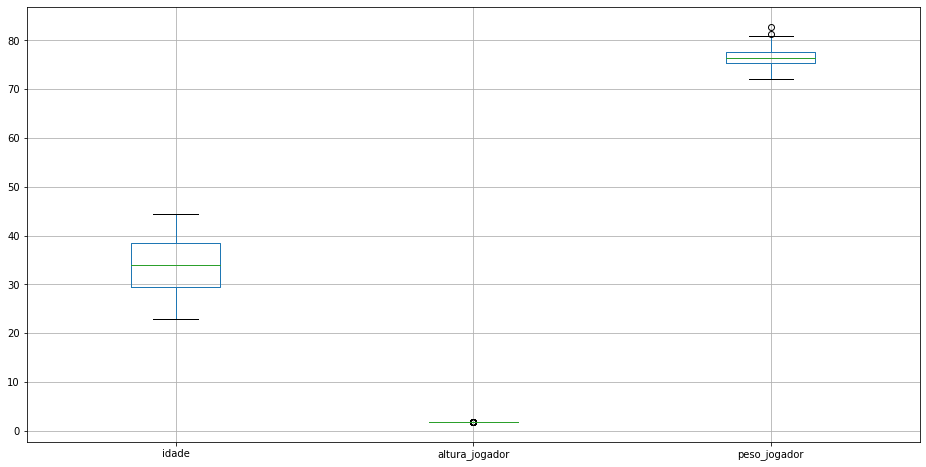

In [ ]:
media_classificacao_time.drop(columns = ['classificacao_time','ano']).boxplot(figsize = (16,8))
plt.show()

# O gráfico fica ruim devido a escala dos valores, então é melhor gerar gráficos separados.

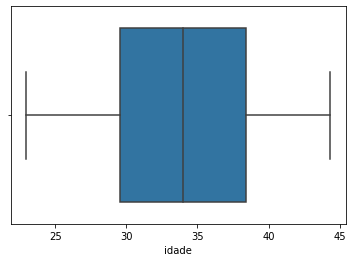

In [ ]:
sns.boxplot(data = media_classificacao_time, x = 'idade')

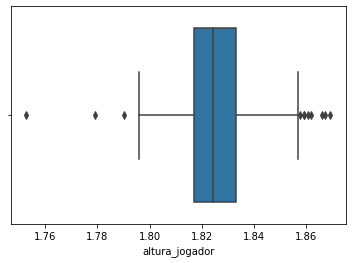

In [ ]:
sns.boxplot(data = media_classificacao_time, x = 'altura_jogador')

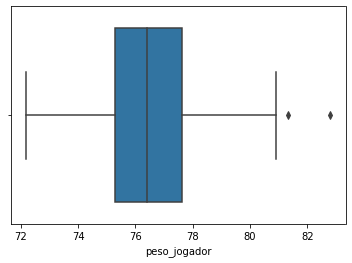

In [ ]:
sns.boxplot(data = media_classificacao_time, x = 'peso_jogador')

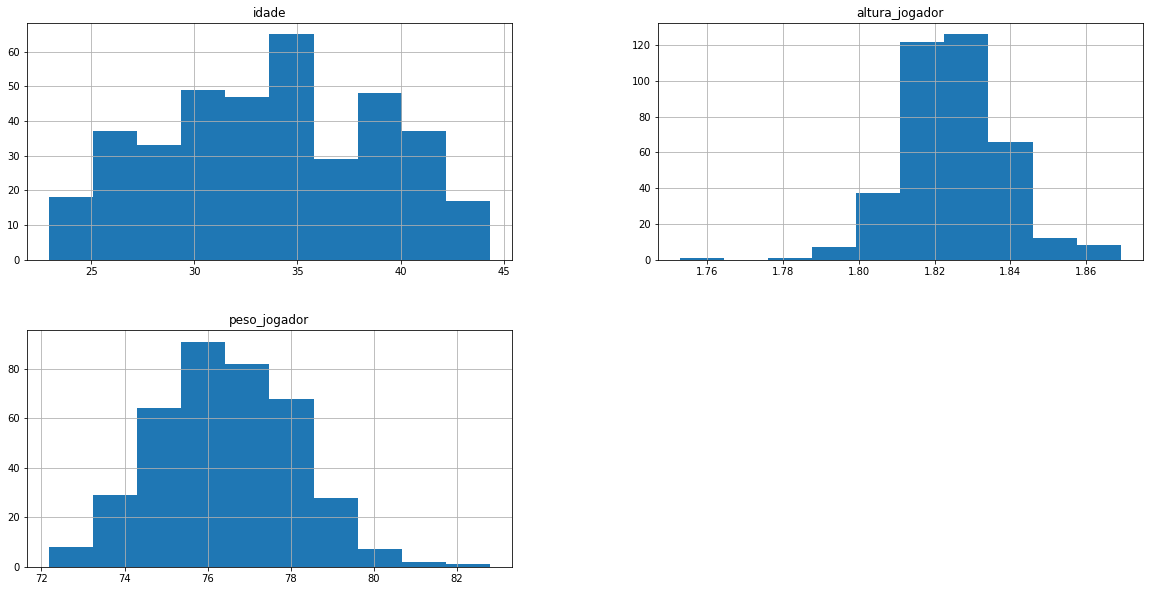

In [ ]:
media_classificacao_time.drop(columns = ['ano','classificacao_time']).hist(figsize = (20,10))
plt.show()

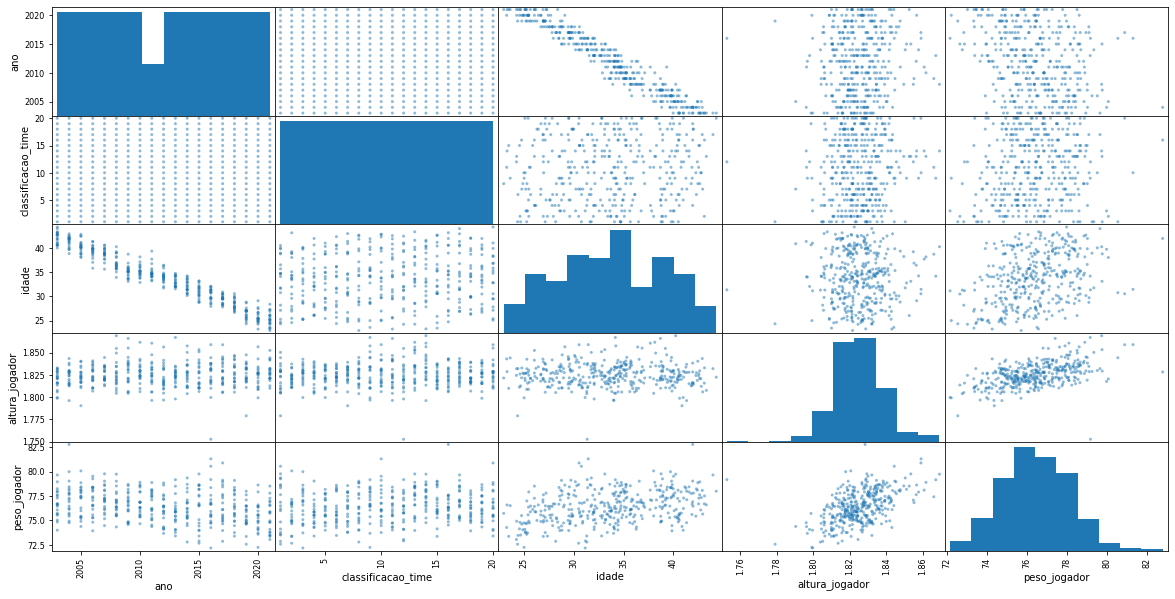

In [ ]:
pd.plotting.scatter_matrix(media_classificacao_time, figsize = (20,10))
plt.show()

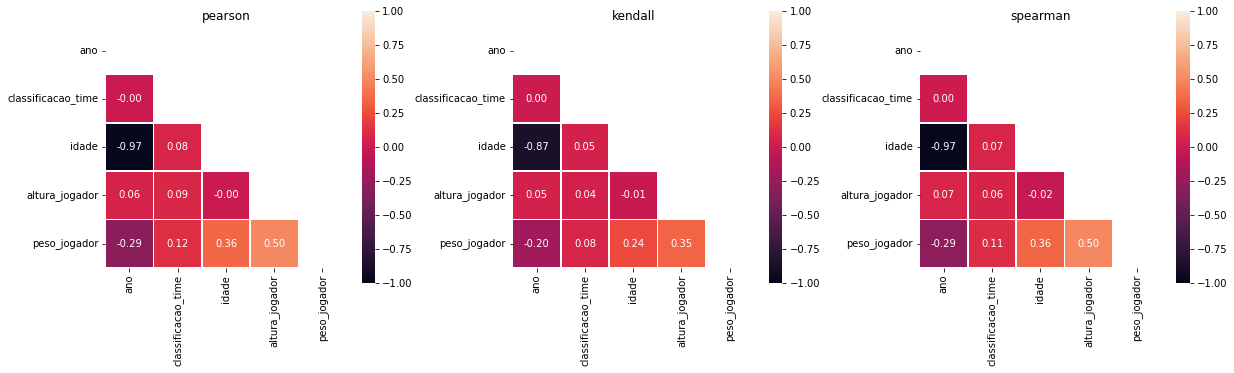

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.35)

corr     = media_classificacao_time.corr()
kendall  = media_classificacao_time.corr('kendall')
spearman = media_classificacao_time.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 45)
#axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 45)
#axs[2].set_xticklabels(axs[2].get_xticks(), rotation = 45)

plt.show()

ano e idade possuem uma correlação muito alta, então uma delas deve ser retirada pra treinar o modelo. 

Como a variável alvo (classificacao_time) não possui nenhuma correlação, então deve-se utilizar um algoritmo supervisionado não linear, como regressão logística e árvore de decisão.

# Treinamento do modelo

## Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.warn('deprecated', DeprecationWarning)
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: deprecated
  import sys


In [ ]:
x = media_classificacao_time.drop(columns = ['ano','classificacao_time'])
y = media_classificacao_time['classificacao_time']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [ ]:
print('Tamanho do treino:', len(x_treino))
print('Tamanho do teste:', len(x_teste))

Tamanho do treino: 254
Tamanho do teste: 126


## Normalizando a base

In [ ]:
scaler = MinMaxScaler()
x_treino_scaler = scaler.fit_transform(x_treino)
x_teste_scaler = scaler.transform(x_teste)
x_teste_scaler[:5]

array([[0.36817102, 0.59025927, 0.29791219],
       [0.23193625, 0.58189161, 0.42245266],
       [0.28352408, 0.7011449 , 0.23782687],
       [0.88507755, 0.67429125, 0.37781785],
       [0.90087703, 0.38332929, 0.23964764]])

## Modelo Regressão Logística

In [ ]:
LR = LogisticRegression(random_state = 0)
LR.fit(x_treino, y_treino)

LogisticRegression(random_state=0)

## Avaliando a Regressão Logistica

In [ ]:
LR.score(x_teste, y_teste) * 100

1.5873015873015872

## Modelo de Regressão Logística com a base normalizada

In [ ]:
LR_scaler = LogisticRegression(random_state = 0)
LR_scaler.fit(x_treino_scaler, y_treino)
LR_scaler.score(x_teste_scaler, y_teste) * 100

1.5873015873015872

O modelo de Regressão Logística tanto com a base normalizada quanto não normalizada retornou um péssimo valor de score, então deve-se tentar outro modelo.

## Modelo Árvore de Regressão

In [ ]:
DT = DecisionTreeClassifier(random_state=0).fit(x_treino, y_treino)

## Avaliando os resultados da Árvore de Regressão

In [ ]:
DT.score(x_teste, y_teste) * 100

3.968253968253968

## Testando a Árvore de Decisão com a base normalizada

In [ ]:
DT_scaler = DecisionTreeClassifier(random_state=0).fit(x_treino_scaler, y_treino)
DT_scaler.score(x_teste_scaler, y_teste) * 100

3.968253968253968

As duas bases também tiveram um péssimo resultado no modelo de Árvore de decisão.

### Seria bom verificar novamente a base de dados para verificar se ela pode ser melhorada para o treinamento do modelo.

# Reformulando a base de dados

In [ ]:
dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


In [ ]:
dados_elenco_merge['classificacao_time_2'] = pd.cut(dados_elenco_merge['classificacao_time'],
                                                    [1,5,17,20], include_lowest= True, labels = False)

dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time,classificacao_time_2
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1,0
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1,0
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1,0
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1,0
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1,0


In [ ]:
dados_elenco_merge.groupby(['classificacao_time','classificacao_time_2']).ano.count()

classificacao_time  classificacao_time_2
1                   0                       626
2                   0                       641
3                   0                       666
4                   0                       677
5                   0                       622
6                   1                       576
7                   1                       599
8                   1                       611
9                   1                       584
10                  1                       567
11                  1                       614
12                  1                       615
13                  1                       565
14                  1                       572
15                  1                       612
16                  1                       584
17                  1                       570
18                  2                       586
19                  2                       566
20                  2                       594

In [ ]:
# Criando a coluna para saber se o jogador é estrangeiro
dados_elenco_merge.loc[:,'estrangeiro'] = dados_elenco_merge.nacionalidade.apply(lambda x:1 if x!= 'Inglaterra' else 0)
dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time,classificacao_time_2,estrangeiro
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1,0,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1,0,0
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1,0,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1,0,0
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1,0,0


In [ ]:
# atualizando a media de classificação do time pela nova classificação
media_classificacao_time = dados_elenco_merge.groupby(['ano','classificacao_time_2']).agg({'idade':'mean','altura_jogador':'mean','peso_jogador':'mean'}).reset_index()
media_classificacao_time.head()

,ano,classificacao_time_2,idade,altura_jogador,peso_jogador
0,2003,0,40.976190,1.818743,76.018072
1,2003,1,42.373178,1.821686,77.077151
2,2003,2,42.301370,1.812329,76.712329
3,2004,0,40.067485,1.828354,77.558282
4,2004,1,41.632836,1.822275,77.241791


In [ ]:
qtd_jogadores_posicao = dados_elenco_merge.groupby(['ano','classificacao_time_2']).nome.count().reset_index().rename(columns = {'nome':'qte_jogadores'})
qtd_jogadores_posicao.head()

,ano,classificacao_time_2,qte_jogadores
0,2003,0,168
1,2003,1,343
2,2003,2,73
3,2004,0,166
4,2004,1,340


In [ ]:
qtd_jogadores_posicao = (dados_elenco_merge.groupby(['ano','classificacao_time_2'])).agg({'nome':'count','time':'nunique'}).reset_index().rename(columns={'nome':'qte_jogadores'})
qtd_jogadores_posicao.head()

,ano,classificacao_time_2,qte_jogadores,time
0,2003,0,168,5
1,2003,1,343,12
2,2003,2,73,3
3,2004,0,166,5
4,2004,1,340,12


In [ ]:
qtd_jogadores_posicao.loc[:,'media_jogadores'] = qtd_jogadores_posicao['qte_jogadores'] / qtd_jogadores_posicao['time']
qtd_jogadores_posicao.head()

,ano,classificacao_time_2,qte_jogadores,time,media_jogadores
0,2003,0,168,5,33.600000
1,2003,1,343,12,28.583333
2,2003,2,73,3,24.333333
3,2004,0,166,5,33.200000
4,2004,1,340,12,28.333333


In [ ]:
# Calculando a porcentagem de estrangeiros para cada posição da classificação
perc_estrangeiro = dados_elenco_merge.groupby(['ano','classificacao_time_2']).estrangeiro.value_counts(normalize=True)*100
perc_estrangeiro

ano   classificacao_time_2  estrangeiro
2003  0                     1              63.095238
                            0              36.904762
      1                     1              54.810496
                            0              45.189504
      2                     0              52.054795
                                             ...    
2021  0                     0              37.974684
      1                     1              56.250000
                            0              43.750000
      2                     1              59.756098
                            0              40.243902
Name: estrangeiro, Length: 114, dtype: float64

In [ ]:
perc_estrangeiro = pd.DataFrame(perc_estrangeiro)
perc_estrangeiro.head()

estrangeiro
ano  classificacao_time_2 estrangeiro             
2003 0                    1              63.095238
                          0              36.904762
     1                    1              54.810496
                          0              45.189504
     2                    0              52.054795

In [ ]:
perc_estrangeiro.rename(columns = {'estrangeiro':'pct_estrangeiro'}, inplace = True)
perc_estrangeiro.head()

pct_estrangeiro
ano  classificacao_time_2 estrangeiro                 
2003 0                    1                  63.095238
                          0                  36.904762
     1                    1                  54.810496
                          0                  45.189504
     2                    0                  52.054795

In [ ]:
perc_estrangeiro = perc_estrangeiro.reset_index()
perc_estrangeiro.head()

,ano,classificacao_time_2,estrangeiro,pct_estrangeiro
0,2003,0,1,63.095238
1,2003,0,0,36.904762
2,2003,1,1,54.810496
3,2003,1,0,45.189504
4,2003,2,0,52.054795


In [ ]:
perc_estrangeiro = perc_estrangeiro.query('estrangeiro == 1')
perc_estrangeiro.head()

,ano,classificacao_time_2,estrangeiro,pct_estrangeiro
0,2003,0,1,63.095238
2,2003,1,1,54.810496
5,2003,2,1,47.945205
6,2004,0,1,65.662651
8,2004,1,1,56.176471


In [ ]:
media_classificacao_time = pd.concat([media_classificacao_time, qtd_jogadores_posicao, perc_estrangeiro], axis = 1, join='inner')
media_classificacao_time.head()

,ano,classificacao_time_2,idade,altura_jogador,peso_jogador,ano,classificacao_time_2,qte_jogadores,time,media_jogadores,ano,classificacao_time_2,estrangeiro,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,2003,0,168,5,33.600000,2003,0,1,63.095238
2,2003,2,42.301370,1.812329,76.712329,2003,2,73,3,24.333333,2003,1,1,54.810496
5,2004,2,41.602410,1.820952,76.904762,2004,2,84,3,28.000000,2003,2,1,47.945205
6,2005,0,39.031250,1.827250,76.925000,2005,0,160,5,32.000000,2004,0,1,65.662651
8,2005,2,39.295775,1.824366,77.070423,2005,2,71,3,23.666667,2004,1,1,56.176471


In [ ]:
media_classificacao_time = media_classificacao_time.loc[:, ~media_classificacao_time.columns.duplicated()]
media_classificacao_time.head()

,ano,classificacao_time_2,idade,altura_jogador,peso_jogador,qte_jogadores,time,media_jogadores,estrangeiro,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,5,33.600000,1,63.095238
2,2003,2,42.301370,1.812329,76.712329,73,3,24.333333,1,54.810496
5,2004,2,41.602410,1.820952,76.904762,84,3,28.000000,1,47.945205
6,2005,0,39.031250,1.827250,76.925000,160,5,32.000000,1,65.662651
8,2005,2,39.295775,1.824366,77.070423,71,3,23.666667,1,56.176471


In [ ]:
media_classificacao_time = media_classificacao_time.drop(columns = ['estrangeiro','time'])
media_classificacao_time.head()

,ano,classificacao_time_2,idade,altura_jogador,peso_jogador,qte_jogadores,media_jogadores,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,33.600000,63.095238
2,2003,2,42.301370,1.812329,76.712329,73,24.333333,54.810496
5,2004,2,41.602410,1.820952,76.904762,84,28.000000,47.945205
6,2005,0,39.031250,1.827250,76.925000,160,32.000000,65.662651
8,2005,2,39.295775,1.824366,77.070423,71,23.666667,56.176471


In [ ]:
media_classificacao_time.to_csv('media_classificacao_time_V2.csv',index = False)

# Nova Exploração de Dados

In [ ]:
media_classificacao_time.isna().sum()

ano                     0
classificacao_time_2    0
idade                   0
altura_jogador          0
peso_jogador            0
qte_jogadores           0
media_jogadores         0
pct_estrangeiro         0
dtype: int64

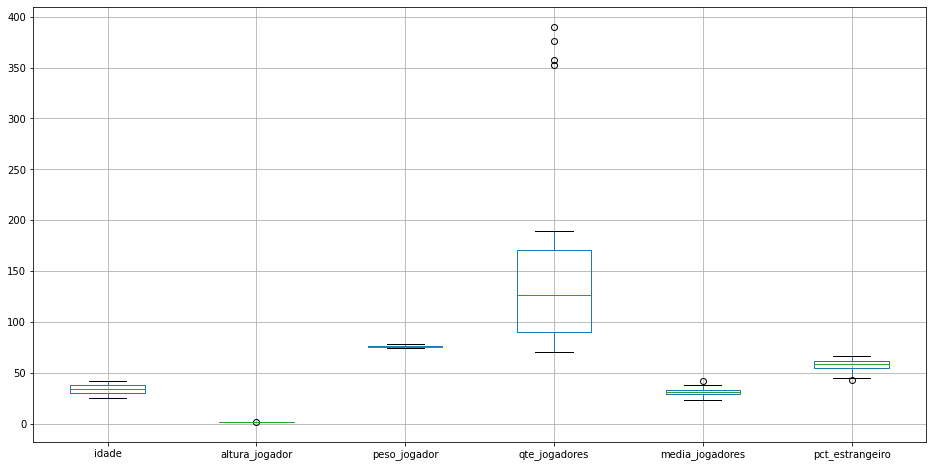

In [ ]:
media_classificacao_time.drop(columns=['classificacao_time_2','ano']).boxplot(figsize=(16,8))

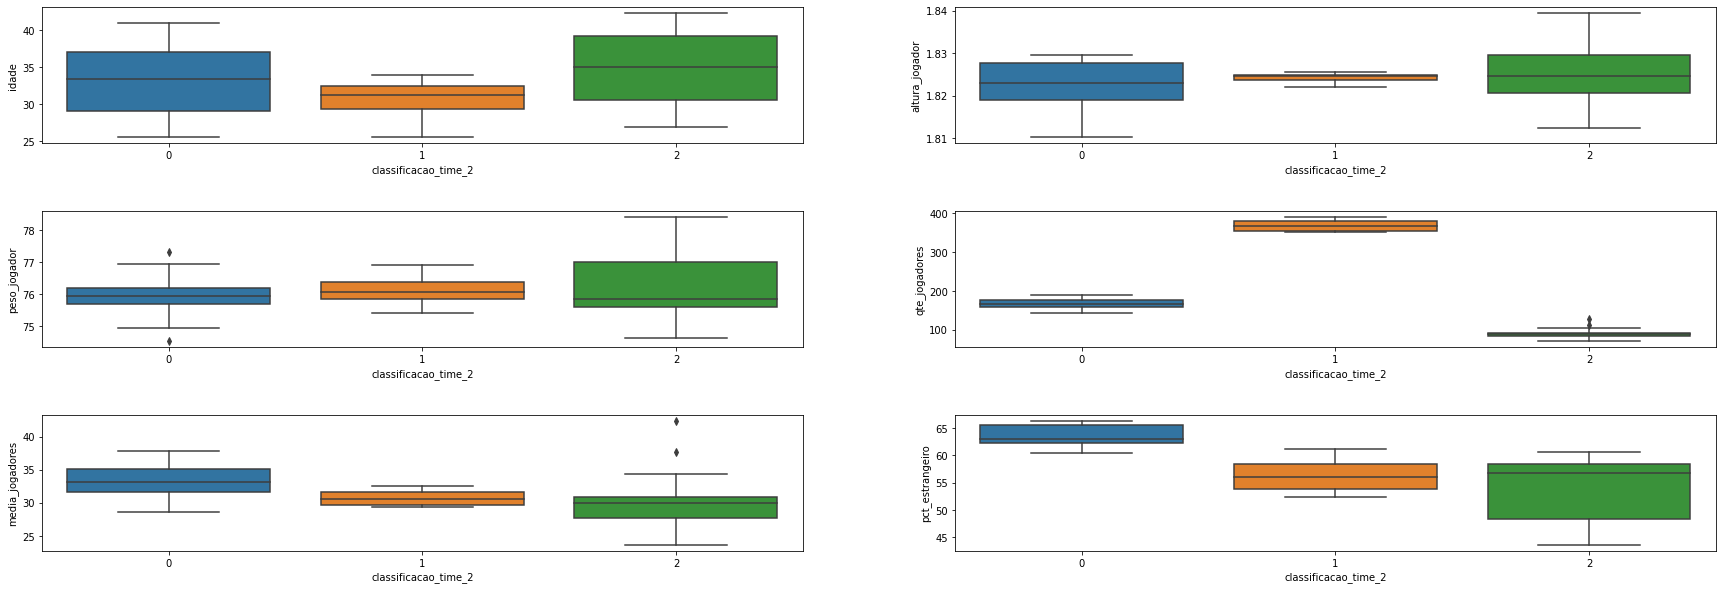

In [ ]:
fig = plt.figure(figsize = (30,10))
fig.subplots_adjust(hspace=.5, wspace=0.2)
i = 1
for j,c in enumerate(media_classificacao_time.columns): #['VL_FLX_VNCT','VL_VNCT','VL_FATM','IN_TRNS_TITD']):
  if c not in ['classificacao_time_2','ano','time']:
      ax = fig.add_subplot(3, 2, i)
      sns.boxplot(x='classificacao_time_2',y=c,data=media_classificacao_time)
      i += 1

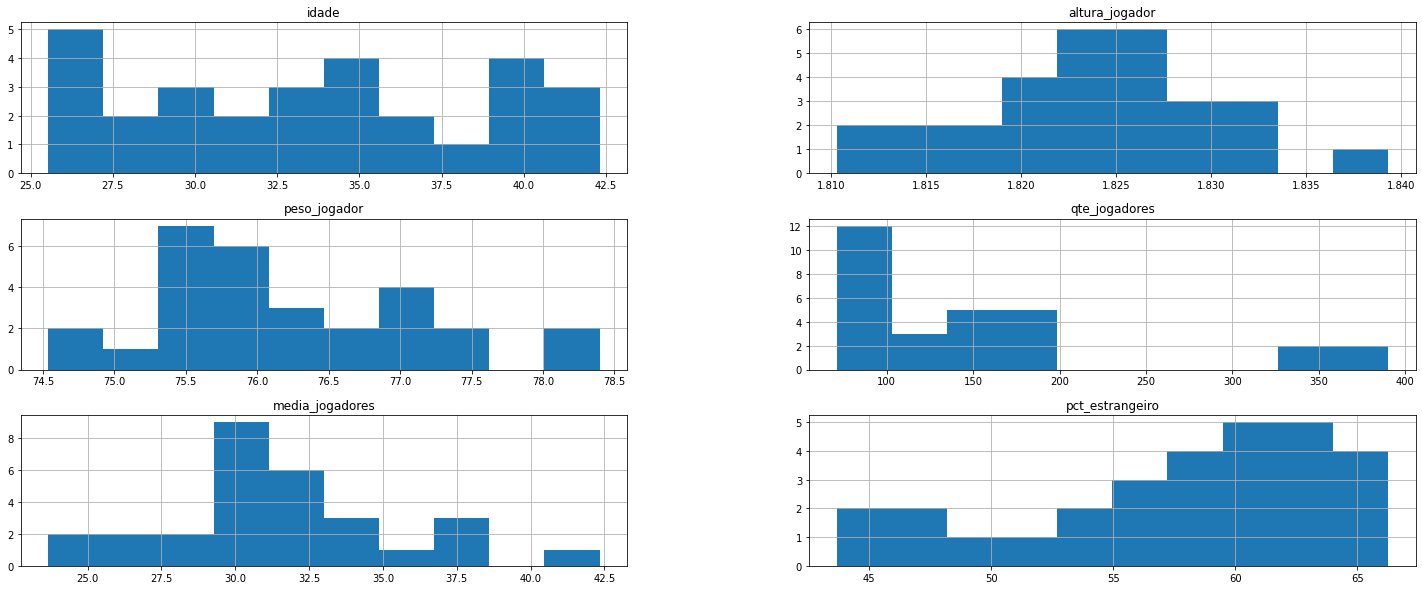

In [ ]:
media_classificacao_time.drop(columns=['ano','classificacao_time_2']).hist(figsize=(25,10))
plt.show()

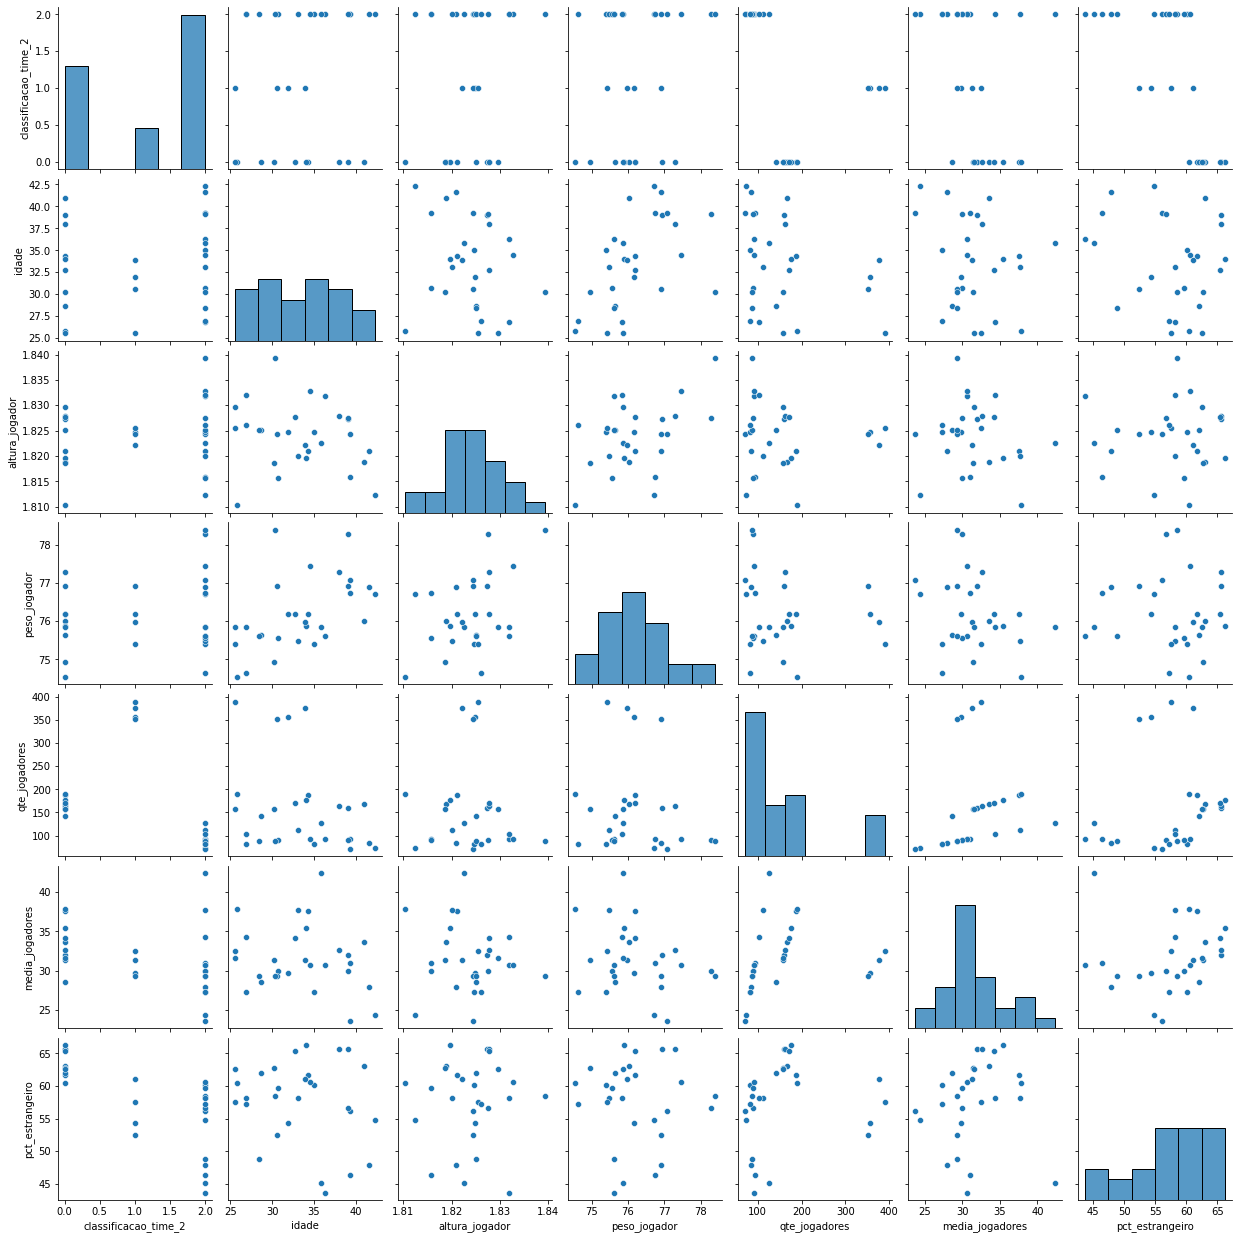

In [ ]:
sns.pairplot(media_classificacao_time.drop(columns =['ano']))
plt.show()

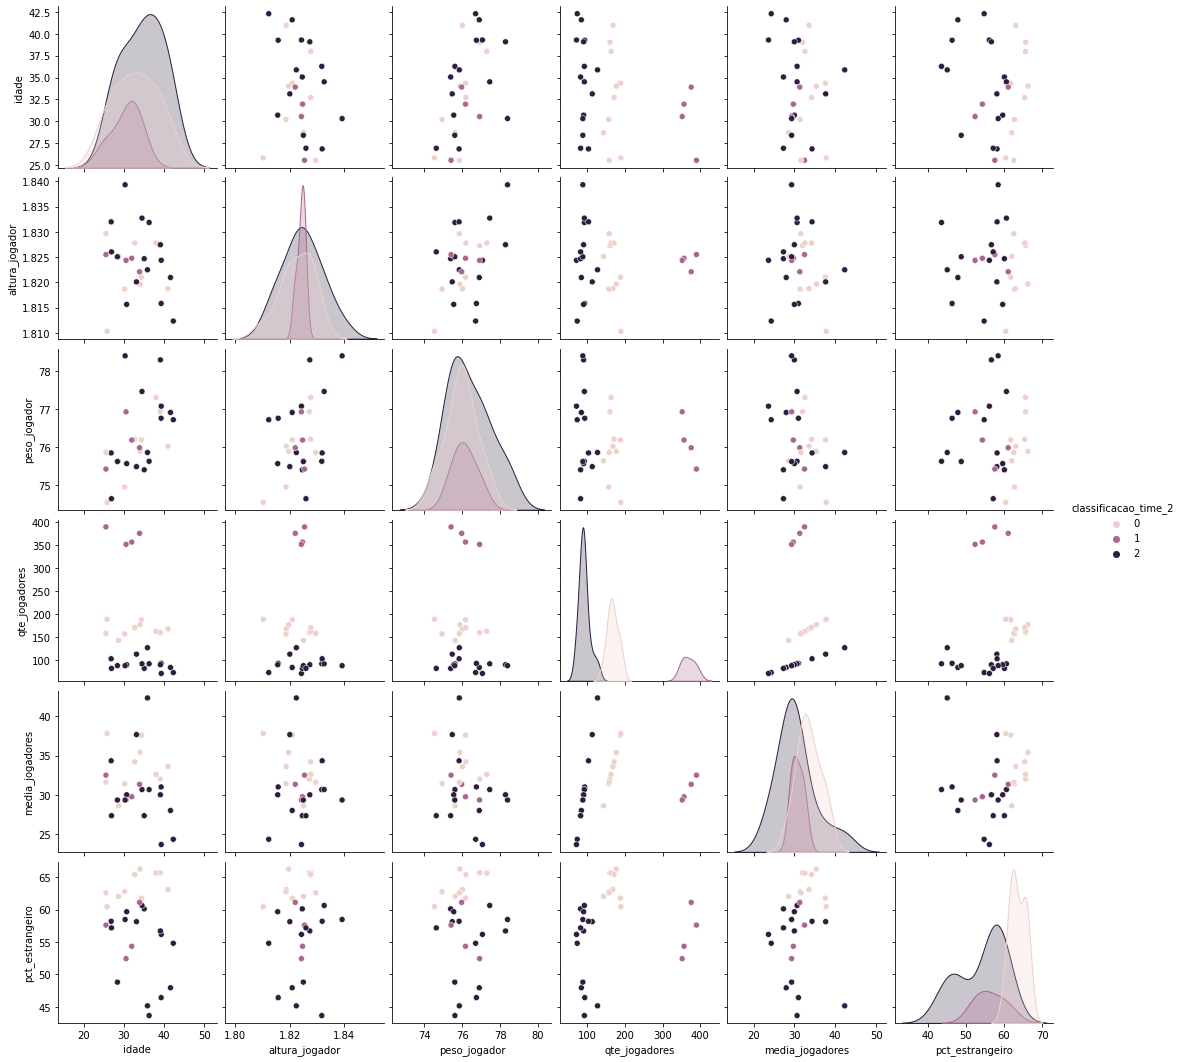

In [ ]:
sns.pairplot(media_classificacao_time.drop(columns =['ano']),hue='classificacao_time_2')
plt.show()

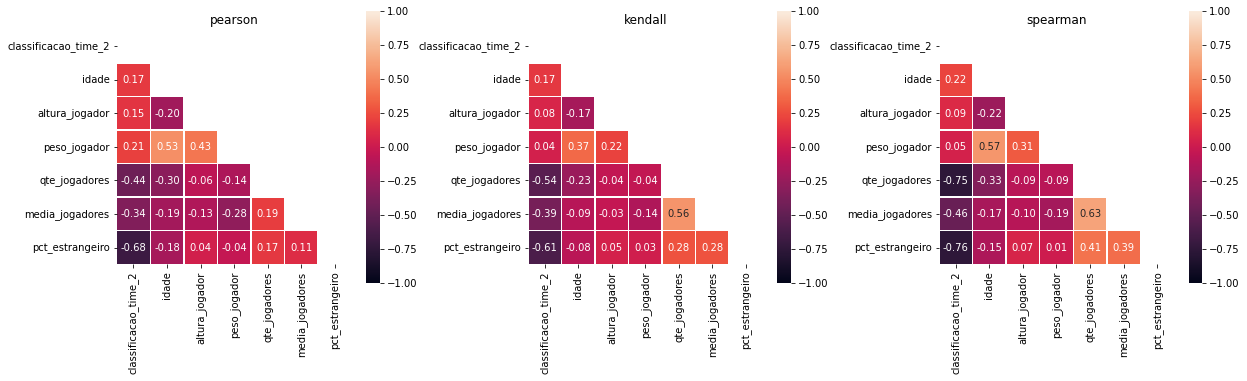

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.4)

corr     = media_classificacao_time.drop(columns=['ano']).corr()
kendall  = media_classificacao_time.drop(columns=['ano']).corr('kendall')
spearman = media_classificacao_time.drop(columns=['ano']).corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 45)
#axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 45)
#axs[2].set_xticklabels(axs[2].get_xticks(), rotation = 45)

plt.show()

# **Treinamento do Modelo com os novos dados**

In [ ]:
media_classificacao_time = pd.read_csv('media_classificacao_time_V2.csv')
media_classificacao_time.head()

,ano,classificacao_time_2,idade,altura_jogador,peso_jogador,qte_jogadores,media_jogadores,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,33.600000,63.095238
1,2003,2,42.301370,1.812329,76.712329,73,24.333333,54.810496
2,2004,2,41.602410,1.820952,76.904762,84,28.000000,47.945205
3,2005,0,39.031250,1.827250,76.925000,160,32.000000,65.662651
4,2005,2,39.295775,1.824366,77.070423,71,23.666667,56.176471


In [ ]:
x = media_classificacao_time.drop(columns=['ano','classificacao_time_2','qte_jogadores'])
y = media_classificacao_time['classificacao_time_2']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [ ]:
print(len(x_treino))

20


## Normalizando a base

In [ ]:
scaler = MinMaxScaler()
x_treino_scaler = scaler.fit_transform(x_treino)
x_teste_scaler = scaler.transform(x_teste)
x_teste_scaler

array([[-0.01679187,  0.86218388,  0.3506738 ,  0.425     ,  0.84947518],
       [ 0.44387251,  0.43683838,  0.25076658,  0.75      ,  0.63304309],
       [ 0.49784713,  0.4176899 ,  0.35812842,  0.62857143,  1.02902335],
       [ 0.27246464,  1.29434972,  1.02837531,  0.30357143,  0.64938549],
       [ 0.63492912,  0.96122339,  0.2885317 ,  0.375     , -0.07313263],
       [ 0.51809296,  0.47820059,  0.43839182,  0.74642857,  0.80986897],
       [ 0.17453573,  0.66213831,  0.29163429,  0.26428571,  0.82333688],
       [ 0.9196206 ,  0.37681693,  0.3947478 ,  0.53214286,  0.87476868],
       [-0.01691787,  0.67787888,  0.23393213,  0.47321429,  0.60715022]])

## Modelo de Regressão Logística

In [ ]:
# Base não normalizada
LR = LogisticRegression(random_state = 0)
LR.fit(x_treino, y_treino)
LR.score(x_teste, y_teste) * 100

77.77777777777779

In [ ]:
# Base normalizada
LR_scaler = LogisticRegression(random_state = 0)
LR_scaler.fit(x_treino_scaler, y_treino)
LR_scaler.score(x_teste_scaler, y_teste) * 100

44.44444444444444

## Modelo de Árvore de Decisão

In [ ]:
DT = DecisionTreeClassifier(random_state=0).fit(x_treino, y_treino)
DT.score(x_teste,y_teste)

0.6666666666666666

In [ ]:
DT_scaler = DecisionTreeClassifier(random_state=0).fit(x_treino_scaler, y_treino)
DT_scaler.score(x_teste_scaler, y_teste)

0.6666666666666666

## Avaliando as variáveis mais importantes para o modelo

In [ ]:
for i in zip(x.columns, DT.feature_importances_):
  print(i)

('idade', 0.14639639639639643)
('altura_jogador', 0.0)
('peso_jogador', 0.2837837837837839)
('media_jogadores', 0.0)
('pct_estrangeiro', 0.5698198198198197)


# Validação do modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, f1_score, accuracy_score

predicao = LR.predict(x_teste)
predicao



array([0, 2, 0, 2, 2, 0, 2, 0, 2])

In [ ]:
print(classification_report(y_pred = predicao, y_true=y_teste))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         1
           2       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.53      0.60      0.55         9
weighted avg       0.76      0.78      0.74         9



In [ ]:
confusion_matrix(y_pred = predicao, y_true=y_teste)

array([[4, 0, 1],
       [0, 0, 1],
       [0, 0, 3]])

<Figure size 720x432 with 0 Axes>

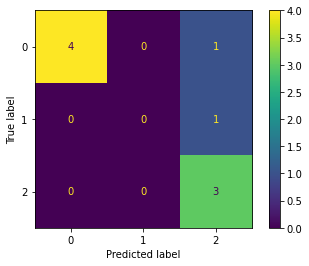

In [ ]:
plt.figure(figsize=(10,6))
plot_confusion_matrix(LR,x_teste,y_teste)
plt.show()

In [ ]:
acuracia = accuracy_score(y_pred = predicao, y_true=y_teste) * 100
print('A acuracia é de %.2f%%' % acuracia)

A acuracia é de 77.78%


In [ ]:
score_f1 = f1_score(y_pred = predicao, y_true=y_teste, average = 'macro') * 100
print('O F1-score é de %.2f%%' % score_f1)

O F1-score é de 54.63%


O modelo está razoável, é possível melhora-lo de algumas maneiras, mas por ora vou salva-lo em um arquivo.

# Salvando o modelo em arquivo

In [ ]:
import joblib as jb

model = LR
description = 'Modelo de Regressão Logística para classificar a possível posição do time no campeonato com o elenco atual.  \
Foram utilizadas as seguintes colunas: ' + " ',".join(x.columns)
date = '26/07/2022'
version = '0.1'
name_model = 'Classificacao_times_RL'
metrics = 'acc: 0.7778 e f1-score: 0.5463'

dic_save_model = dict({'model':model,'metadata':{'description':description,'author':'Mateus Brandao',
                                                  'date':date,'source_code_version':version,'metrics':metrics}})

dic_save_model

{'metadata': {'author': 'Mateus Brandao',
  'date': '26/07/2022',
  'description': "Modelo de Regressão Logística para classificar a possível posição do time no campeonato com o elenco atual.  Foram utilizadas as seguintes colunas: idade ',altura_jogador ',peso_jogador ',media_jogadores ',pct_estrangeiro",
  'metrics': 'acc: 0.7778 e f1-score: 0.5463',
  'source_code_version': '0.1'},
 'model': LogisticRegression(random_state=0)}

In [ ]:
jb.dump(dic_save_model, name_model+'.joblib')

['Classificacao_times_RL.joblib']

# Abrindo o modelo salvo e testando em novos dados

In [ ]:
arquivo_modelo = jb.load('Classificacao_times_RL.joblib')
arquivo_modelo

{'metadata': {'author': 'Mateus Brandao',
  'date': '26/07/2022',
  'description': "Modelo de Regressão Logística para classificar a possível posição do time no campeonato com o elenco atual.  Foram utilizadas as seguintes colunas: idade ',altura_jogador ',peso_jogador ',media_jogadores ',pct_estrangeiro",
  'metrics': 'acc: 0.7778 e f1-score: 0.5463',
  'source_code_version': '0.1'},
 'model': LogisticRegression(random_state=0)}

In [ ]:
modelo = arquivo_modelo['model']
modelo

LogisticRegression(random_state=0)

In [ ]:
# criando novos dados
media_idade = 20
media_altura = 1.77
media_peso_jogador = 70.0
media_jogadores = 35
pct_estrangeiro = 55

novos_dados = np.array([[media_idade,media_altura,media_peso_jogador,media_jogadores,pct_estrangeiro]])
novos_dados

array([[20.  ,  1.77, 70.  , 35.  , 55.  ]])

In [ ]:
resultado = modelo.predict(novos_dados)
print('Com o elenco atual, é possível que o time fique classificado no grupo ', resultado[0])

Com o elenco atual, é possível que o time fique classificado no grupo  0


In [ ]:
media_idade = 45
media_altura = 1.82
media_peso_jogador = 78.0
media_jogadores = 22
pct_estrangeiro = 37

novos_dados_2 = np.array([[media_idade,media_altura,media_peso_jogador,media_jogadores,pct_estrangeiro]])
novos_dados_2

array([[45.  ,  1.82, 78.  , 22.  , 37.  ]])

In [ ]:
resultado_2 = modelo.predict(novos_dados_2)
print('Com o elenco atual, é possível que o time fique classificado no grupo ', resultado_2[0])

Com o elenco atual, é possível que o time fique classificado no grupo  2
